# Credit Card Fraud Detection

Throughout the financial sector, machine learning algorithms are being developed to detect fraudulent transactions.  In this project, that is exactly what we are going to be doing as well.

Using a dataset of of nearly 28,500 credit card transactions and multiple unsupervised anomaly detection algorithms, we are going to identify transactions with a high probability of being credit card fraud.

Dataset is from Kaggle or UCI.

Furthermore, using metrics suchs as precision, recall, and F1-scores, we will investigate why the classification accuracy for these algorithms can be misleading.

In addition, we will explore the use of data visualization techniques common in data science, such as parameter histograms and correlation matrices, to gain a better understanding of the underlying distribution of data in our data set. 

Let's get started!

### Importing the library

In [1]:
import pandas as pd
import numpy as np

### Importing the dataset

In [2]:
data = pd.read_csv("F:\\PROJECT\\7. Credit Card Fraud Detection\\Dataset\\creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Visualise the dataset

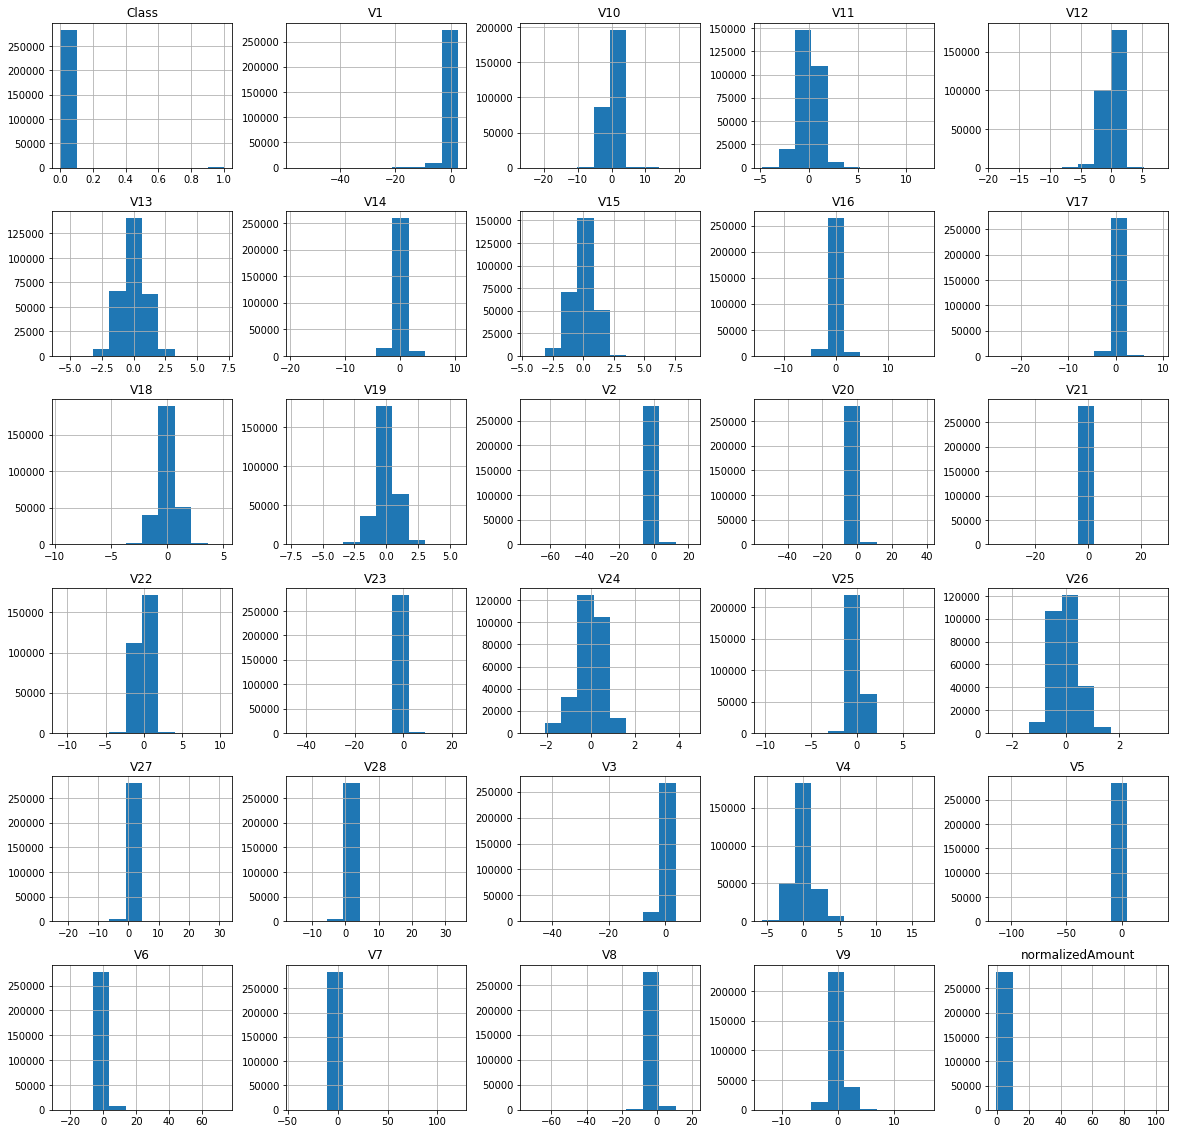

In [27]:
# Plot histograms of each parameter 
import matplotlib.pyplot as plt
data.hist(figsize = (20, 20))
plt.show()

### Checking the Correlation between the variable

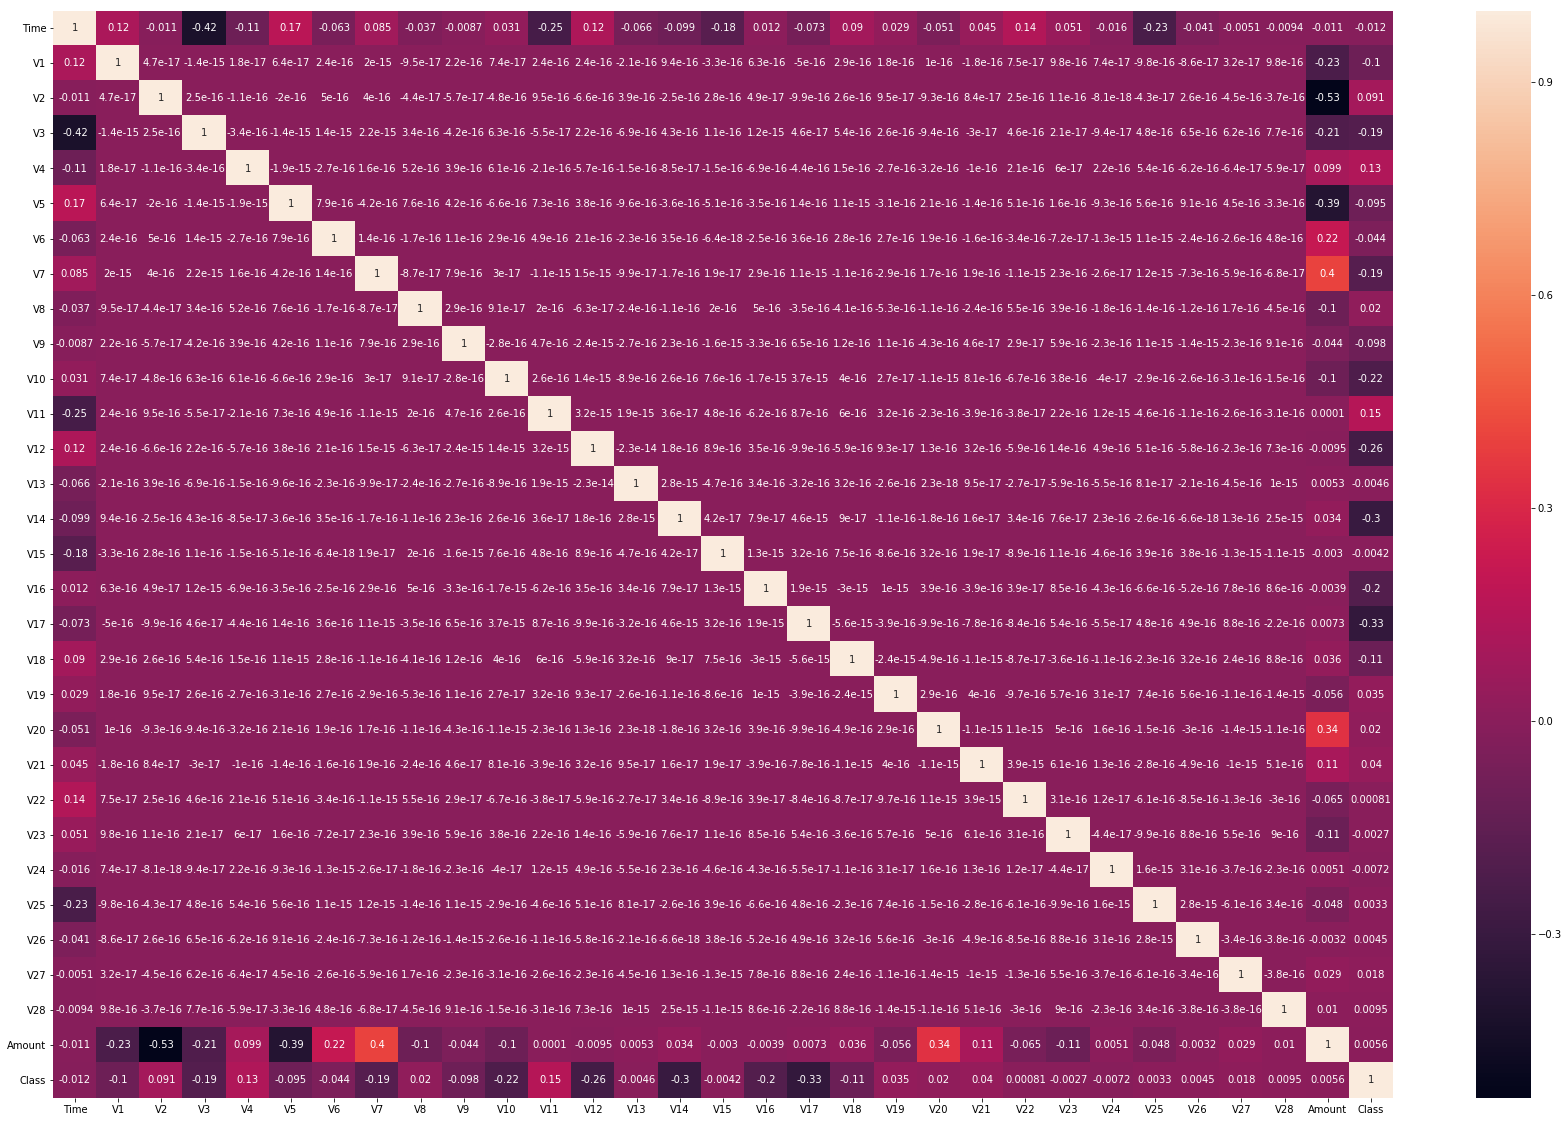

In [6]:
# Let's check the correlation between the variables 
# Strong correlation between the Class, Time, Amount, V2, V3, .........
import seaborn as sns
plt.figure(figsize=(30,20)) 
sns.heatmap(data.corr(), annot=True) 

### Applying the feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis = 1)

In [9]:
data = data.drop(['Time'], axis = 1)

In [10]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


#### Spliting the dataset into X and Y

In [11]:
X = data.iloc[:, data.columns != 'Class']

In [12]:
Y = data.iloc[:, data.columns == 'Class']

#### Spliting the dataset into Train and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state  = 0)

In [14]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

### Applying the RandomForestClassifier

In [16]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [17]:
classifier = RandomForestClassifier(n_estimators= 100)
classifier.fit(X_train, Y_train)

C:\Users\SAMEER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
classifier.fit(X_train, Y_train)

C:\Users\SAMEER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predicting the result using randomforest classifier

In [19]:
Y_pred = classifier.predict(X_test)

In [21]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
classifier.score(X_test, Y_test)

0.9995201479348805

### Analyse the result using confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

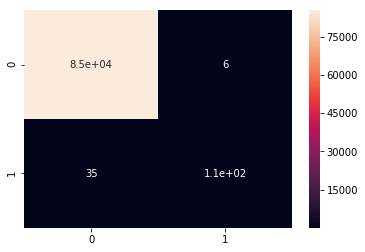

In [24]:
import seaborn as sns
sns.heatmap(cm, annot = True)

### Analyse the Model Report

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.95      0.76      0.85       147

avg / total       1.00      1.00      1.00     85443



### As we reach the Accuracy of 99.952% using the RandomForestClassifier.
##### which is better than Decision Tree Model prediction Result